<a href="https://colab.research.google.com/github/jpaezg93/Case-Study-Cardiac-Risks/blob/main/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from sklearn.manifold import TSNE
pd.options.mode.chained_assignment = None


In [2]:
df =  pd.read_csv('Cleaned_Data.csv')
df.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,AgeRange
0,75,False,582,False,20,True,265000.00,1.9,130,True,False,4,True,Elder
1,55,False,7861,False,38,False,263358.03,1.1,136,True,False,6,True,Adult
2,65,False,146,False,20,False,162000.00,1.3,129,True,True,7,True,Elder
3,50,True,111,False,20,False,210000.00,1.9,137,True,False,7,True,Adult
4,65,True,160,True,20,False,327000.00,2.7,116,False,False,8,True,Elder


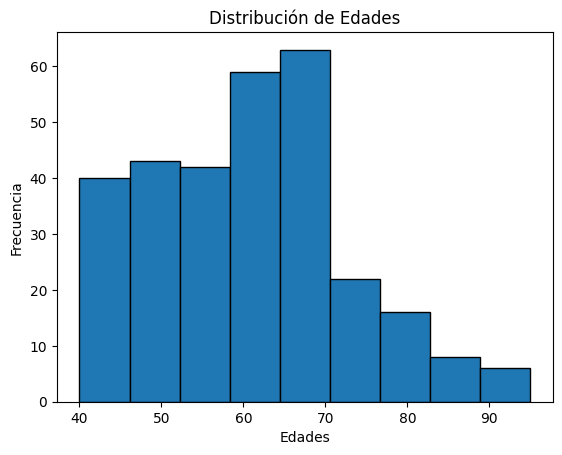

In [3]:
bins = int(np.log2(len(df['age'])))+1
plt.hist(df['age'], bins=bins, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

plt.show()

Text(0, 0.5, 'Counts')

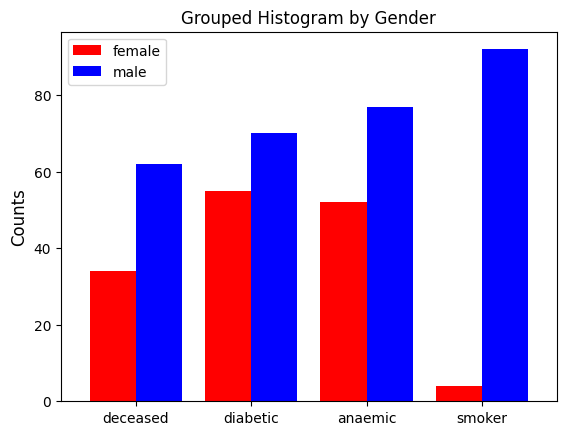

In [4]:
df1 = df[['sex', 'anaemia', 'diabetes', 'smoking', 'DEATH_EVENT']]
df1.rename(columns={'DEATH_EVENT':'deceased', 'diabetes':'diabetic', 'anaemia':'anaemic', 'smoking':'smoker'},inplace=True)
df2 = df1.groupby('sex', as_index=False).agg({'deceased':'sum', 'diabetic':'sum', 'anaemic':'sum','smoker':'sum'})
df2['sex'] = df2['sex'].replace(to_replace={True: 'male', False: 'female'})
df2.index=['female','male']
df3 = df2.drop('sex',axis=1).T
barplot = df3.plot(kind="bar", color={'blue','red'}, width=0.8)
plt.xticks(rotation='horizontal')
plt.title('Grouped Histogram by Gender')
plt.ylabel('Counts', fontsize= 12)



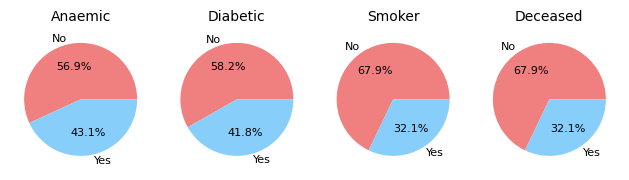

In [5]:
labels = ['No','Yes']
colors = ['lightcoral', 'lightskyblue']
fig, axs = plt.subplots(1, 4)
axs[0].pie(df1['anaemic'].value_counts(), labels= labels, colors= colors, autopct='%1.1f%%', textprops={'fontsize': 8})
axs[0].set_title('Anaemic', fontsize= 10)
axs[1].pie(df1['diabetic'].value_counts(), labels= labels, colors= colors, autopct='%1.1f%%', textprops={'fontsize': 8})
axs[1].set_title('Diabetic', fontsize= 10)
axs[2].pie(df1['smoker'].value_counts(), labels= labels, colors= colors, autopct='%1.1f%%', textprops={'fontsize': 8})
axs[2].set_title('Smoker', fontsize= 10)
axs[3].pie(df1['deceased'].value_counts(), labels= labels, colors= colors, autopct='%1.1f%%', textprops={'fontsize': 8})
axs[3].set_title('Deceased', fontsize= 10)

plt.tight_layout()
plt.show()



In [6]:
df_g = df.drop(columns=['age', 'DEATH_EVENT', 'AgeRange'])
df_g = df_g.values
death_event = df['DEATH_EVENT'].values.astype(int)
X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(df_g)

In [7]:
#death_event = death_event.astype(int)
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x= X_embedded[:,0], y=X_embedded[:,1], z=X_embedded[:,2],  # Datos de x, y y z
    mode='markers',  # Estilo de marcador
    marker=dict(
        size=5,  # Tamaño de los marcadores
        color= death_event,  # Variable z para la escala de colores
        colorscale='Plasma',  # Colormap para los colores de los marcadores
        opacity=0.8  # Opacidad de los marcadores
    )
))

# Personalizar el diseño de la gráfica
fig.update_layout(
    title='Scatter plot of TSNE reduction algorithm axis',  # Título de la gráfica
    scene=dict(
        xaxis_title='X',  # Etiqueta del eje x
        yaxis_title='Y',  # Etiqueta del eje y
        zaxis_title='Z'  # Etiqueta del eje z
    )
)

fig.show()